In [2]:
from investesg import InvestESG
import numpy as np

# No ESG Invest; No preference for ESG; Risk free market

In [3]:
env = InvestESG(company_attributes=[{'capital':10000,'climate_risk_exposure':0.5,'beta':0},
                                    {'capital':10000,'climate_risk_exposure':0.5,'beta':0},
                                    {'capital':10000,'climate_risk_exposure':0.5,'beta':0}], 
                                    num_investors=3, initial_climate_event_probability=0.1,
                                    market_performance_baseline=1.05, market_performance_variance=0)

In [4]:
env.reset()
for i in range(100):
    company_actions = {f"company_{i}": env.action_space(f"company_{i}").sample() for i in range(env.num_companies)}
    # company 0 never does anything
    company_actions['company_0'] = 0
    company_actions['company_1'] = 0
    company_actions['company_2'] = 0
    investor_actions = {f"investor_{i}": env.action_space(f"investor_{i}").sample() for i in range(env.num_investors)}
    # mask such that investor 0 only invests in company 0
    investor_actions['investor_0'] = [1, 0, 0]
    investor_actions['investor_1'] = [0, 1, 0]
    investor_actions['investor_2'] = [0, 0, 1]
    actions = {**company_actions, **investor_actions}
    obs, rewards, terminations, truncations, infos = env.step(actions)

<Figure size 640x480 with 0 Axes>

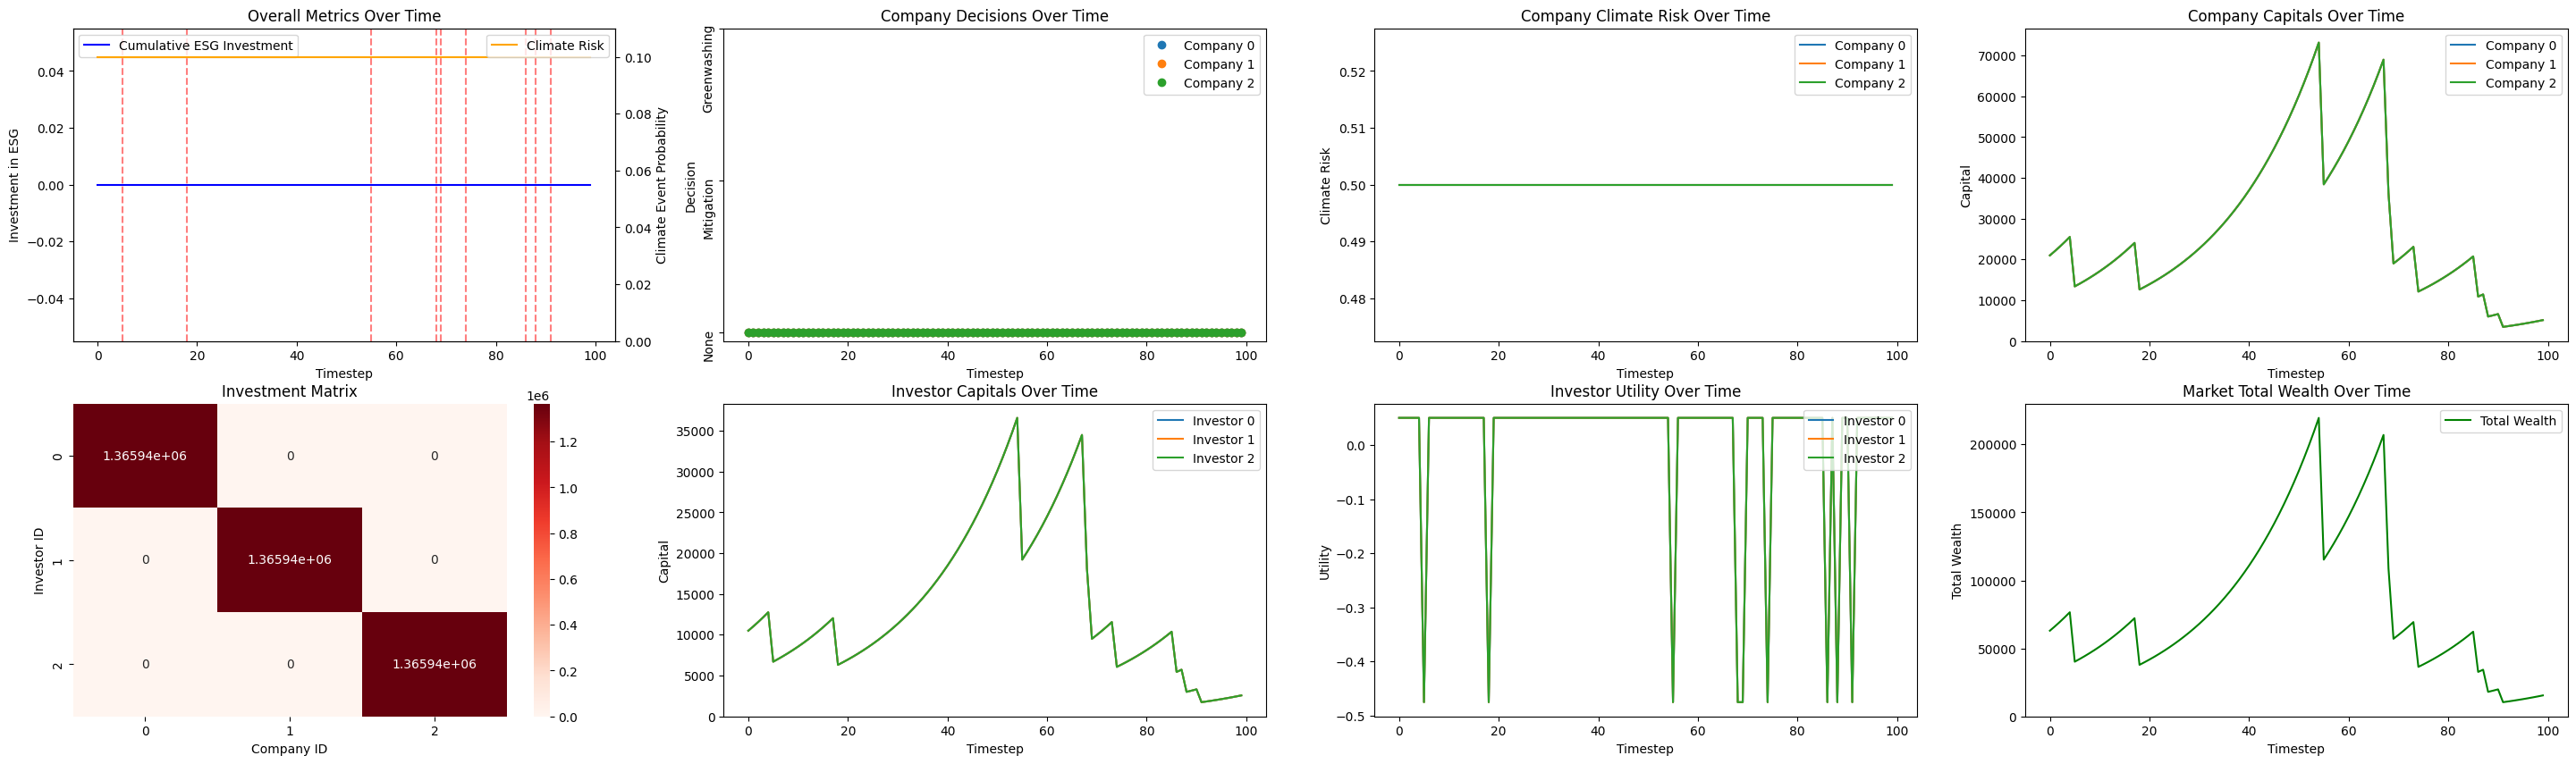

In [5]:
env.render()
env.fig

In [11]:
env.history['market_total_wealth']

[63000.0,
 66150.0,
 69457.5,
 72930.3375,
 76576.846875,
 40203.984609375,
 42214.05633984375,
 44324.63165683595,
 46540.77323967774,
 48867.66940166163,
 51310.94037174472,
 53876.34489033195,
 56570.08713484857,
 59398.52399159099,
 62368.322691170535,
 65486.61882572906,
 68760.87476701551,
 72198.8885053663,
 37904.70146531732,
 39799.85778858319,
 41789.79442801234,
 43879.280399412964,
 46073.20316938361,
 48376.7245778528,
 50795.43705674544,
 53335.07015958272,
 56001.79741756185,
 58801.793538439946,
 61741.84196536194,
 64828.892813630046,
 68070.22120431154,
 71473.58601452713,
 75047.23906525348,
 78799.48476851617,
 82739.44025694196,
 86876.29601978905,
 91220.07707077851,
 95781.05467431745,
 100570.0586580333,
 105598.49034093498,
 110878.33610798173,
 116422.1816633808,
 122243.22699654986,
 128355.30209637736,
 134773.03345119624,
 141511.56137375603,
 148587.00819244384,
 156016.34735206602,
 163817.1234696693,
 172007.9233931528,
 180608.24831281046,
 189638.53697

# One Company Invest in ESG every ten periods; No preference for ESG; Risk free market

<Figure size 640x480 with 0 Axes>

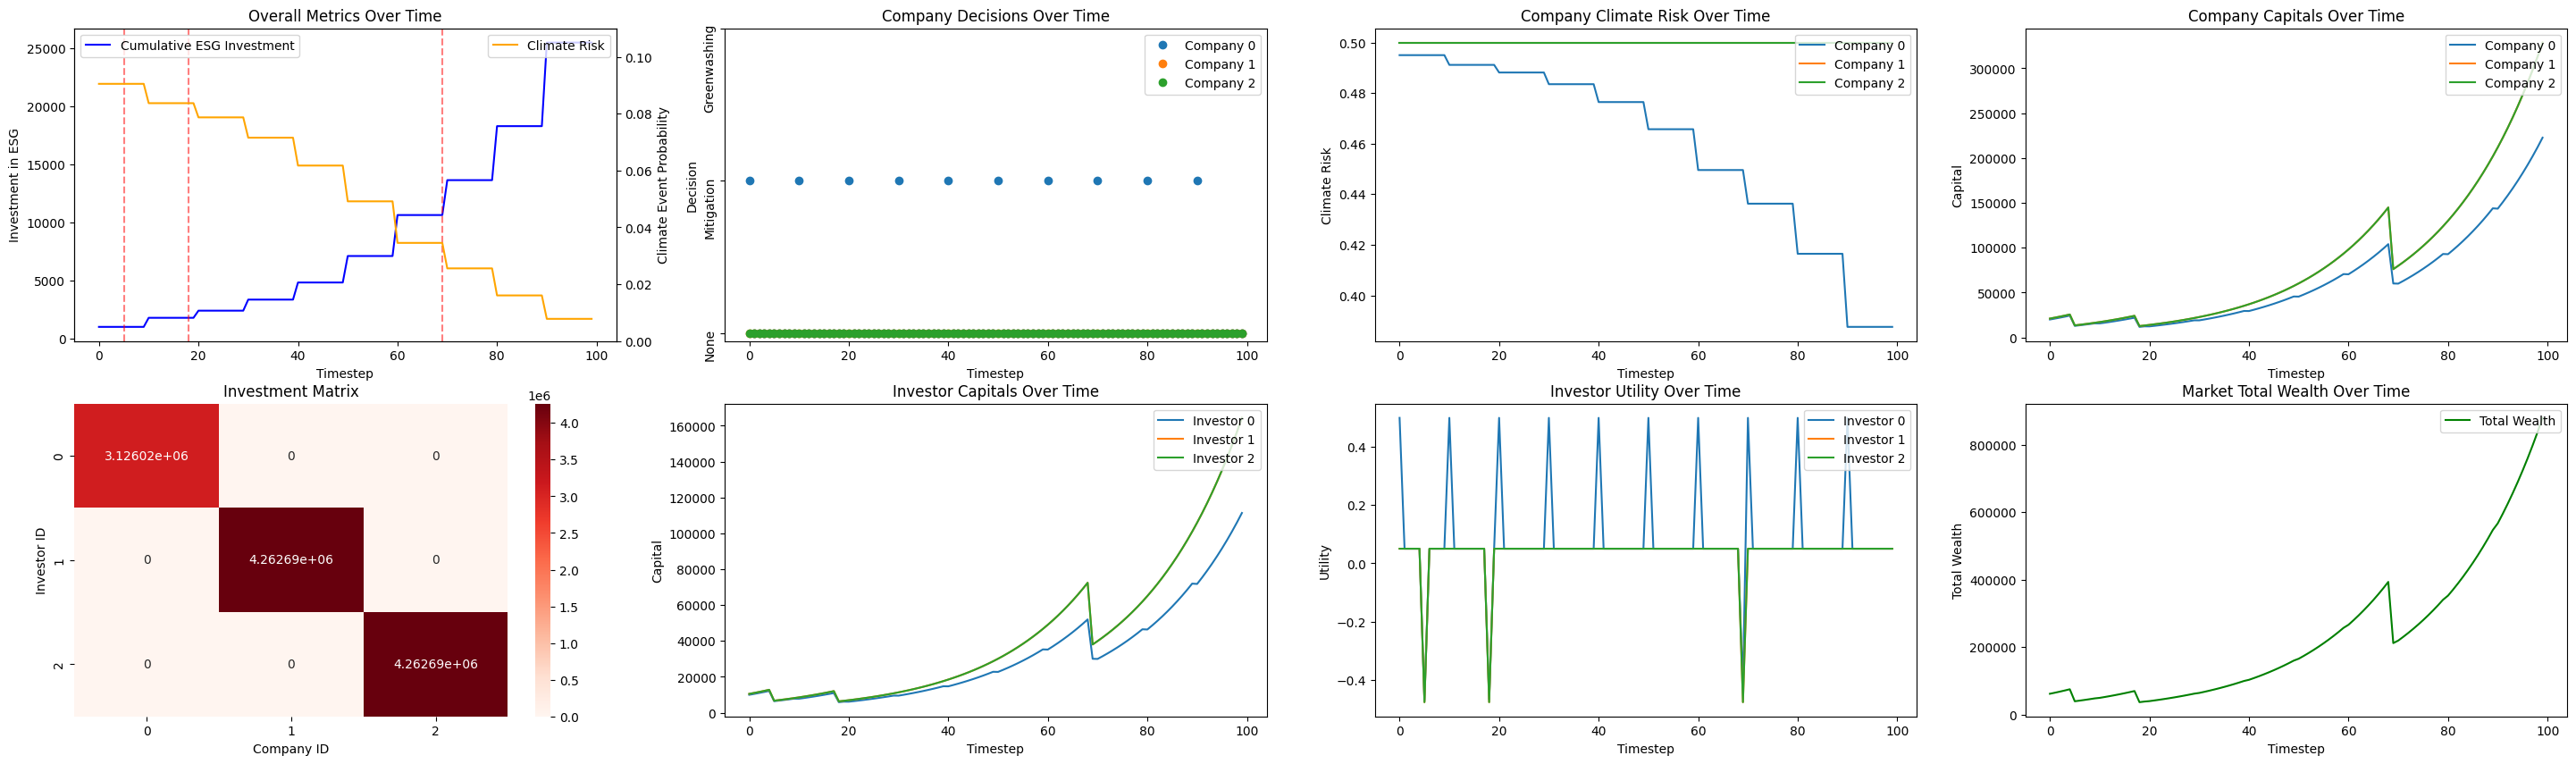

In [6]:
env = InvestESG(company_attributes=[{'capital':10000,'climate_risk_exposure':0.5,'beta':0},
                                    {'capital':10000,'climate_risk_exposure':0.5,'beta':0},
                                    {'capital':10000,'climate_risk_exposure':0.5,'beta':0}],
                investor_attributes=[{'capital':10000,'esg_preference':0.5},
                                     {'capital':10000,'esg_preference':0.5},
                                     {'capital':10000,'esg_preference':0.5}], 
                                    num_investors=3, initial_climate_event_probability=0.1,
                                    market_performance_baseline=1.05, market_performance_variance=0)

env.reset()
for i in range(100):
    company_actions = {f"company_{i}": env.action_space(f"company_{i}").sample() for i in range(env.num_companies)}
    # company invests in ESG every 10 steps, other companies never do
    if i % 10 == 0:
        company_actions['company_0'] = 1
    else:
        company_actions['company_0'] = 0

    company_actions['company_1'] = 0
    company_actions['company_2'] = 0
    investor_actions = {f"investor_{i}": env.action_space(f"investor_{i}").sample() for i in range(env.num_investors)}
    # mask such that investor 0 only invests in company 0
    investor_actions['investor_0'] = [1, 0, 0]
    investor_actions['investor_1'] = [0, 1, 0]
    investor_actions['investor_2'] = [0, 0, 1]
    actions = {**company_actions, **investor_actions}
    obs, rewards, terminations, truncations, infos = env.step(actions)

env.render()
env.fig

In [13]:
env.history['market_total_wealth']

[61950.0,
 65047.5,
 68299.8375,
 71714.78437499999,
 75300.50609375001,
 39660.481830899036,
 41643.41923228382,
 43725.48100373786,
 45911.6458637646,
 48207.11646679268,
 49796.893189191855,
 52286.597908491305,
 54900.847863755705,
 57645.805316783335,
 60527.988142462345,
 63554.2776094253,
 66731.92654973641,
 70068.46793706308,
 36989.91439034232,
 38839.34343342869,
 40135.20330626707,
 42141.91592014967,
 44248.9466647264,
 46461.253946531964,
 48784.22159242781,
 51223.315120618456,
 53784.43832521862,
 56473.5901900488,
 59297.22214812049,
 62262.04570409576,
 64375.32584088412,
 67593.95470649758,
 70973.60251539169,
 74522.19271473053,
 78248.2499240363,
 82160.55999380736,
 86268.53056706696,
 90581.90216898956,
 95110.95985100829,
 99866.44541712795,
 103312.67621183941,
 108478.2592210006,
 113902.08388061992,
 119597.10727322014,
 125576.9093354504,
 131855.65900079216,
 138448.33114940103,
 145370.72440544033,
 152639.22982428162,
 160271.15051406494,
 165890.70437161

# One Company Invest in ESG every ten periods, the other one in greenwashing

<Figure size 640x480 with 0 Axes>

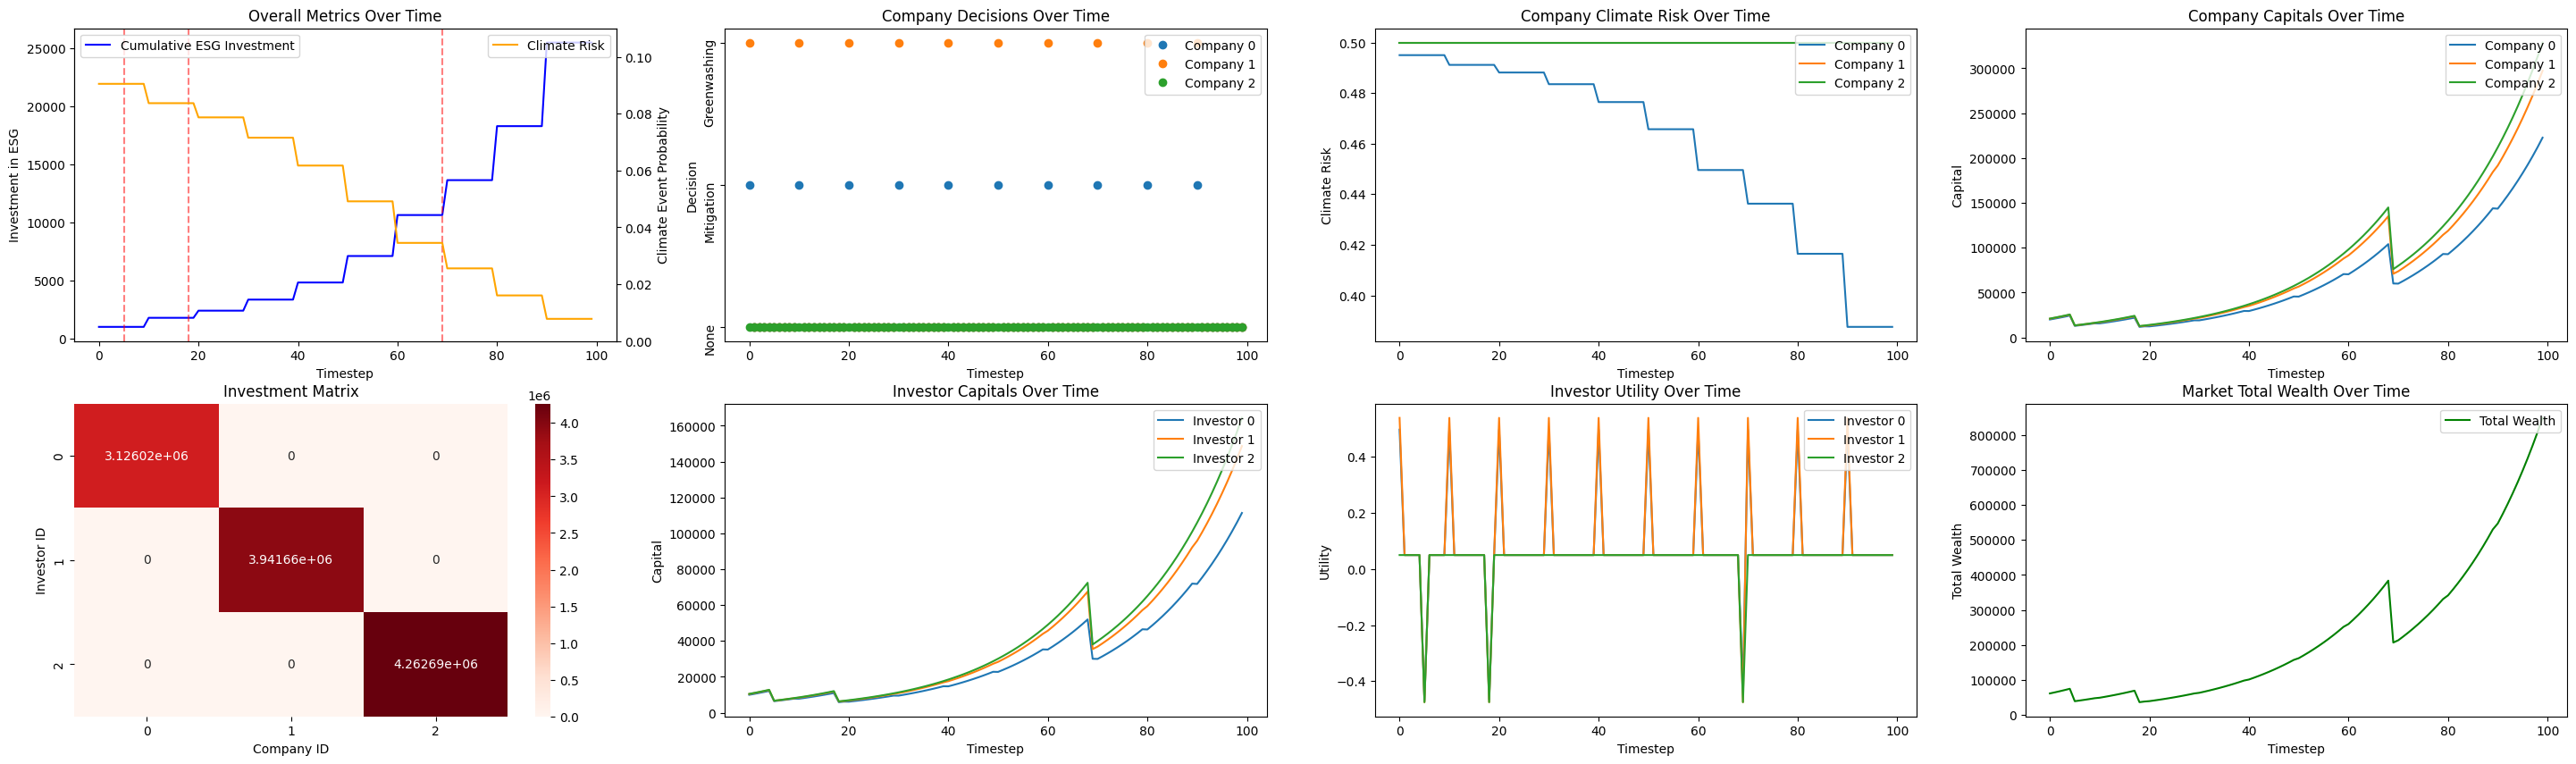

In [7]:
env = InvestESG(company_attributes=[{'capital':10000,'climate_risk_exposure':0.5,'beta':0},
                                    {'capital':10000,'climate_risk_exposure':0.5,'beta':0},
                                    {'capital':10000,'climate_risk_exposure':0.5,'beta':0}],
                investor_attributes=[{'capital':10000,'esg_preference':0.5},
                                     {'capital':10000,'esg_preference':0.5},
                                     {'capital':10000,'esg_preference':0.5}], 
                                    num_investors=3, initial_climate_event_probability=0.1,
                                    market_performance_baseline=1.05, market_performance_variance=0)

env.reset()
for i in range(100):
    company_actions = {f"company_{i}": env.action_space(f"company_{i}").sample() for i in range(env.num_companies)}
    # company invests in ESG every 10 steps, other companies never do
    if i % 10 == 0:
        company_actions['company_0'] = 1
    else:
        company_actions['company_0'] = 0

    # company spends on greenwashing
    if i % 10 == 0:
        company_actions['company_1'] = 2
    else:
        company_actions['company_1'] = 0

    company_actions['company_2'] = 0
    investor_actions = {f"investor_{i}": env.action_space(f"investor_{i}").sample() for i in range(env.num_investors)}
    # mask such that investor 0 only invests in company 0
    investor_actions['investor_0'] = [1, 0, 0]
    investor_actions['investor_1'] = [0, 1, 0]
    investor_actions['investor_2'] = [0, 0, 1]
    actions = {**company_actions, **investor_actions}
    obs, rewards, terminations, truncations, infos = env.step(actions)

env.render()
env.fig

In [15]:
env.history['market_total_wealth'][-1]

848756.6195622493

# A pure Random Case

<Figure size 640x480 with 0 Axes>

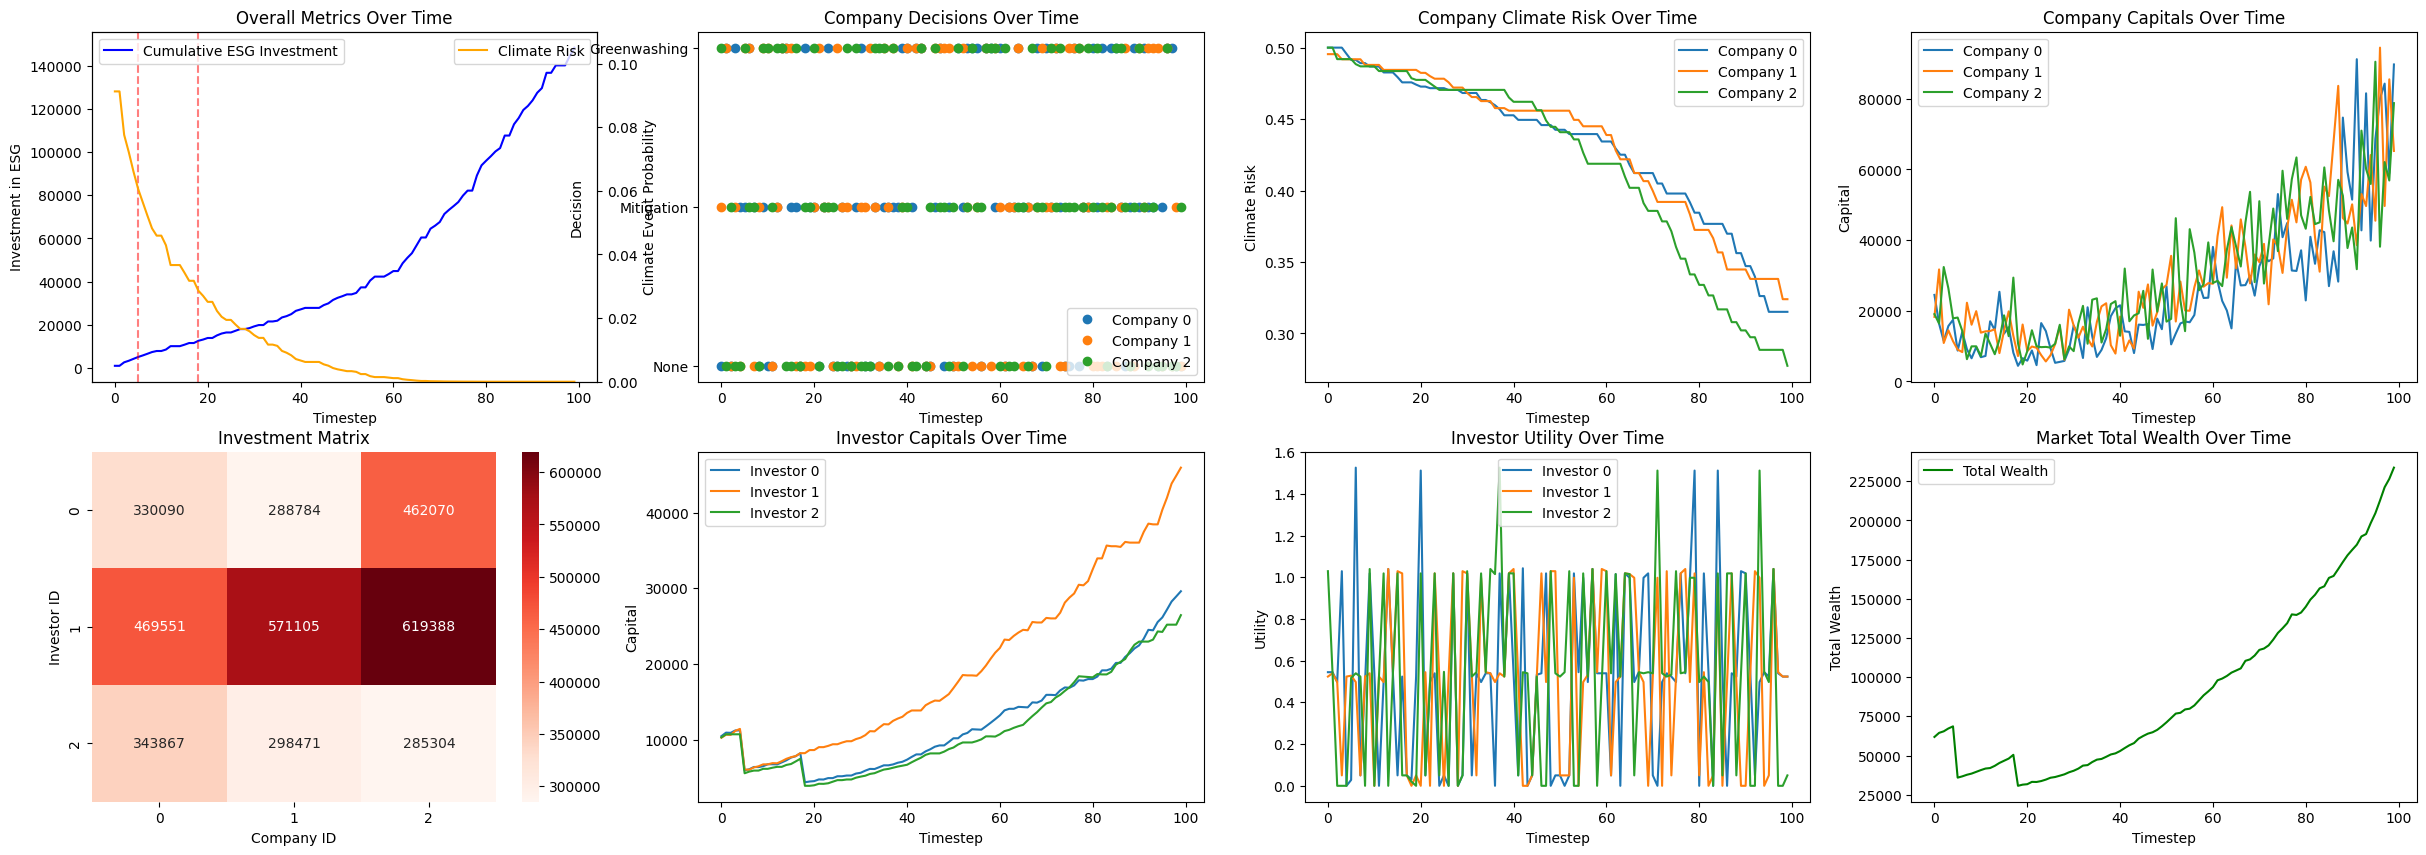

In [7]:
env = InvestESG(company_attributes=[{'capital':10000,'climate_risk_exposure':0.5,'beta':0},
                                    {'capital':10000,'climate_risk_exposure':0.5,'beta':0},
                                    {'capital':10000,'climate_risk_exposure':0.5,'beta':0}],
                investor_attributes=[{'capital':10000,'esg_preference':0.5},
                                     {'capital':10000,'esg_preference':0.5},
                                     {'capital':10000,'esg_preference':0.5}], 
                                    num_investors=3, initial_climate_event_probability=0.1,
                                    market_performance_baseline=1.05, market_performance_variance=0)

env.reset()
for i in range(100):
    company_actions = {f"company_{i}": env.action_space(f"company_{i}").sample() for i in range(env.num_companies)}
    investor_actions = {f"investor_{i}": env.action_space(f"investor_{i}").sample() for i in range(env.num_investors)}
    actions = {**company_actions, **investor_actions}
    obs, rewards, terminations, truncations, infos = env.step(actions)

env.render()
env.fig